**Import các thư viện cần thiết**

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

**Cho tập dữ liệu danh sách các tài liệu/văn bản trả về từ một truy vấn (q) và tập nhãn các kết quả ở dạng nhị phân như bên dưới, trong đó:**
*   **[1]: tài liệu/văn bản có liên quan đến truy vấn**
*   **[0]: tài liệu/văn bản không có liên quan đến truy vấn**

In [ ]:
# Tập danh sách các tài liệu/văn bản trả về ở dạng các mã định danh
search_results = np.array([599, 588, 611, 788, 871, 982, 863, 623, 567, 898])

# Tập nhãn cho các kết quả trả về ở dạng mã định danh tài liệu/văn bản trong [search_results]
labels = np.array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0])

# Xác định tổng số lượng tài liệu/văn bản thực sự có liên quan đến truy vấn (q) trong hệ thống
total_relevant_docs = 8

**Chúng ta viết hàm tính độ chính xác (precision) và độ nhậy (recall) tại các vị trí top@k trong danh sách kết quả trả về [search_results]**

**Với precision (P) và recall (R), được xác định như sau:**

### $$P=\frac{\text{Số lượng tài liệu có liên quan tìm thấy}}{\text{Tổng số lượng tài liệu tìm thấy}}$$
### $$R=\frac{\text{Số lượng tài liệu có liên quan tìm thấy}}{\text{Tổng số lượng toàn bộ tài liệu có liên quan}}$$

In [ ]:
# Viết hàm xác định độ chính xác precision/recall của top@k kết quả
def calculate_precision_recall_at(k):
    total_relevant_docs_at_k = len(np.where(labels[:k] == 1)[0])
    precision = total_relevant_docs_at_k / k
    recall = total_relevant_docs_at_k / total_relevant_docs
    return (precision, recall)

# Xác định giá trị của khoảng [0, k] mà chúng ta sẽ đánh giá kết quả trả về [search_results] dựa trên nhãn [labels]
eval_range = 10

# Chúng ta tạo 2 danh sách để lưu trữ lại độ chính xác (precision) và độ nhậy (recall) tại các vị trí k
precisions = []
recalls = []

# Tiến hành duyệt qua từng giá trị (k) và tính ra độ chính xác (precision) & độ nhậy (recall) tương ứng
for k in range(1, eval_range + 1):
  (precision, recall) = calculate_precision_recall_at(k)
  precisions.append(precision)
  recalls.append(recall)
  print('Top@[{}] - có độ chính xác precison (P): [{:.6f}], recall (R): [{:.6f}]'.format(k, precision, recall))

Top@[1] - có độ chính xác precison (P): [1.000000], recall (R): [0.125000]
Top@[2] - có độ chính xác precison (P): [1.000000], recall (R): [0.250000]
Top@[3] - có độ chính xác precison (P): [0.666667], recall (R): [0.250000]
Top@[4] - có độ chính xác precison (P): [0.750000], recall (R): [0.375000]
Top@[5] - có độ chính xác precison (P): [0.600000], recall (R): [0.375000]
Top@[6] - có độ chính xác precison (P): [0.666667], recall (R): [0.500000]
Top@[7] - có độ chính xác precison (P): [0.571429], recall (R): [0.500000]
Top@[8] - có độ chính xác precison (P): [0.500000], recall (R): [0.500000]
Top@[9] - có độ chính xác precison (P): [0.555556], recall (R): [0.625000]
Top@[10] - có độ chính xác precison (P): [0.500000], recall (R): [0.625000]


**Chúng ta thử dùng thư viện matplotlib để vẽ đường đồ thị thể hiện sự biến thiên của Precision và Recall với các giá trị (k) khác nhau**

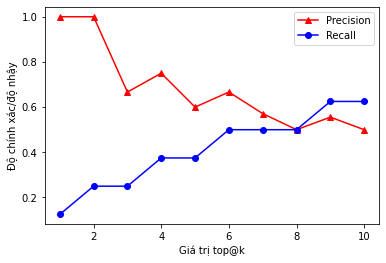

In [ ]:
# Định nghĩa trục (x) - giá trị k: từ 1 -> 10
x_axis = [k for k in range(1, eval_range + 1)]

# Khai báo ghi chú/nhãn cho trục x và trục y
plt.xlabel('Giá trị top@k')
plt.ylabel('Độ chính xác/độ nhậy')

# Định nghĩa đường biến thiên độ chính xác (precision) - màu đỏ (c=r)
plt.plot(x_axis, precisions, label='Precision', marker='^', c='r')

# Định nghĩa đường biến thiên độ nhậy (recall) - màu xanh (c=b)
plt.plot(x_axis, recalls, label='Recall', marker='o', c='b')

# Hiển thị (labels) và chú thích cho các đường precision/recall trong đồ thị
plt.legend()

# Hiện đồ thị lên màn hình
plt.show()

**Chúng ta thử dùng thư viện Scikit-Learn để vẽ đường cong (curve) Precision-Recall thể hiện sự tương quan giữa độ chính xác/độ nhậy của mô hình**

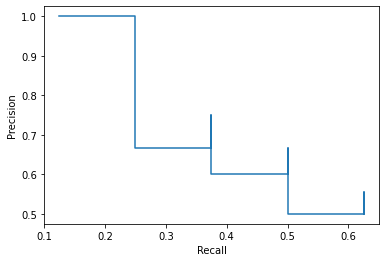

In [ ]:
# Dùng hàm PrecisionRecallDisplay để vẽ đường cong tương quan giữa Precision-Recall
disp = PrecisionRecallDisplay(precision=precisions, recall=recalls)

# Hiện biểu đồ Precision-Recall curve ra màn hình
disp.plot()

**Chúng ta viết hàm xác định độ chính xác R-Precision cho danh sách kết quả trả về [search_results]. Chúng ta biết R = [total_relevant_docs]**

In [ ]:
# Viết hàm tính độ chính xác R-Precision
def calculate_r_precision():
  total_relevant_docs_at_R = len(np.where(labels[:k] == 1)[0])
  return total_relevant_docs_at_R / total_relevant_docs

r_precision = calculate_r_precision()
print(f'Độ chính xác R-Precision của mô hình là: [{r_precision}]')

Độ chính xác R-Precision của mô hình là: [0.625]
